# Movie Recommendation System

## Database 

Kaggle moive database including tmdb 5000 database and user review database.

In [2]:
import pandas as pd 
import numpy as np 

df1=pd.read_csv('./input/archive/tmdb_5000_credits.csv')
df2=pd.read_csv('./input/archive/tmdb_5000_movies.csv')

## Extract Transform Load (ETL)

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

df1 includes movie_id, cast and crew. df2 inludes budget, genere, keywords, ect.

In [7]:
df1.head(5)


,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df2.head(5)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Data Quality Assessment

Weighted rating is added to each moive to counter inbalance issue on composition of average rating.

$$\text{weighted Rating WR} = (\frac{v}{v+m} R) + (\frac{m}{v+m} C ) $$

v is the number of votes.
m is minimum votes to be considered
R is the average rating of the moive
C is mean vote of the whole

In [11]:
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)

print(f"Average rating:{C}/10 and 90% of movie has count of {m}")

Average rating:6.092171559442016/10 and 90% of movie has count of 1838.4000000000015


In [14]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
print(f"{len(q_movies)} number of moives are filtered out")

481 number of moives are filtered out


In [16]:
def weighted_rating(x, m=m, C=C):
    return (x['vote_count']/(x['vote_count']+m) *  x['vote_average']) + (m/(m+x['vote_count']) * C)

Adding new scores to the dataframe.

In [17]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


Database visualise based on weighted rating

In [18]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(5)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


At this step, a rough recmmonding system is already build based on popularity. 

Text(0.5, 1.0, 'Popular Movies')

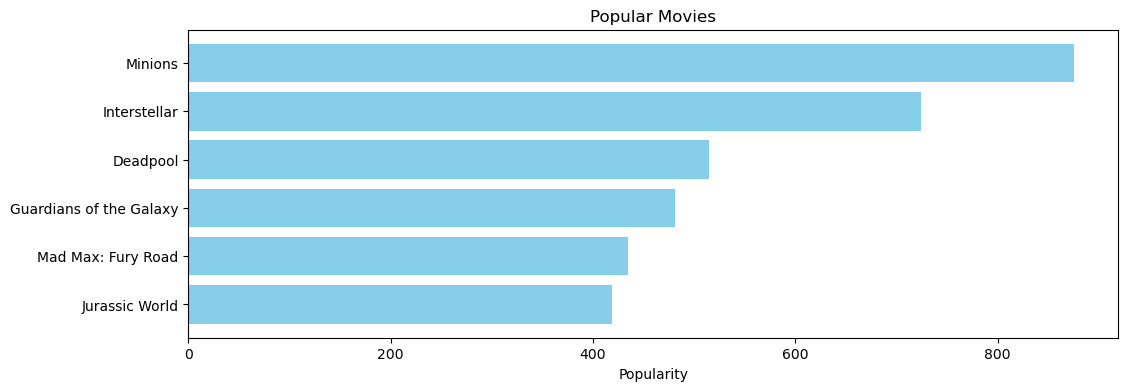

In [21]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## User Specific Recmmonding system with Suprise

# ETL with suprise

In [56]:
from surprise import Reader, Dataset, SVD, model_selection
reader = Reader()
ratings = pd.read_csv('./input/archive/ratings_small.csv')
print(ratings.head())
print(f"number of ratings: {len(ratings)} in this data set")


   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
number of ratings: 100004 in this data set


In [40]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [44]:
svd = SVD()
trainset = data.build_full_trainset()
svd.fit(trainset)
model_selection.cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8986  0.9009  0.8997  0.8962  0.8874  0.8965  0.0048  
MAE (testset)     0.6945  0.6939  0.6929  0.6898  0.6810  0.6904  0.0050  
Fit time          0.60    0.60    0.60    0.62    0.62    0.61    0.01    
Test time         0.08    0.14    0.08    0.16    0.08    0.11    0.03    


{'test_rmse': array([0.89862724, 0.90085426, 0.89966294, 0.89618371, 0.88735885]),
 'test_mae': array([0.69450976, 0.69390862, 0.69288068, 0.68981556, 0.68098602]),
 'fit_time': (0.6007862091064453,
  0.6034519672393799,
  0.5955162048339844,
  0.6223299503326416,
  0.6208441257476807),
 'test_time': (0.08036303520202637,
  0.14364218711853027,
  0.07741498947143555,
  0.1557619571685791,
  0.07992720603942871)}

In [45]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


now we can recommand users unseen movie. based on rating.

In [59]:
svd.predict(1, 300)

Prediction(uid=1, iid=300, r_ui=None, est=2.594489488117805, details={'was_impossible': False})